In [ ]:
#  Import Neccesary Libraries - 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# Load the dataset - 

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Data Cleaning - 


In [ ]:
# Drop duplicates - 

df.drop_duplicates(inplace=True)

In [ ]:
# Handle missing values - 

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)


C:\Users\at603\AppData\Local\Temp\ipykernel_18152\3382073293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)
C:\Users\at603\AppData\Local\Temp\ipykernel_18152\3382073293.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [ ]:
# Extract year and month - 

df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


##### Univariate Analysis - 

Text(0.5, 1.0, 'Distribution of Content Type on Netflix')

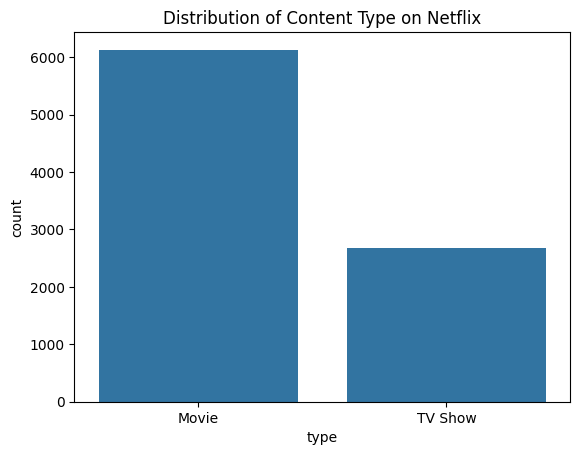

In [ ]:
# Content Type Distribution - 

sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type on Netflix")

<Axes: title={'center': 'Top 10 Content-Producing Countries '}, ylabel='country'>

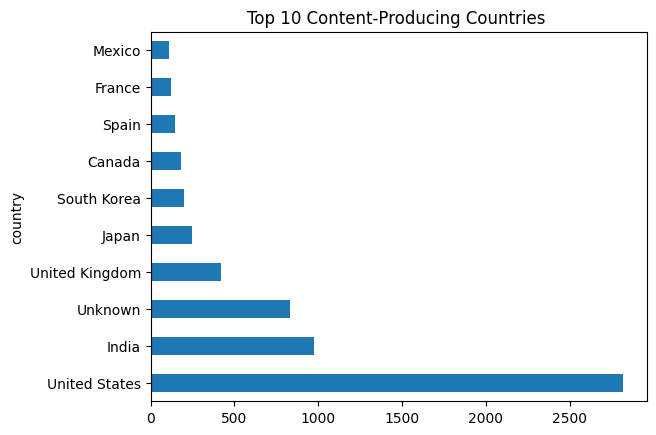

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title="Top 10 Content-Producing Countries ")

#### Time-based Analysis - 

Text(0.5, 1.0, 'Content Added Per Year')

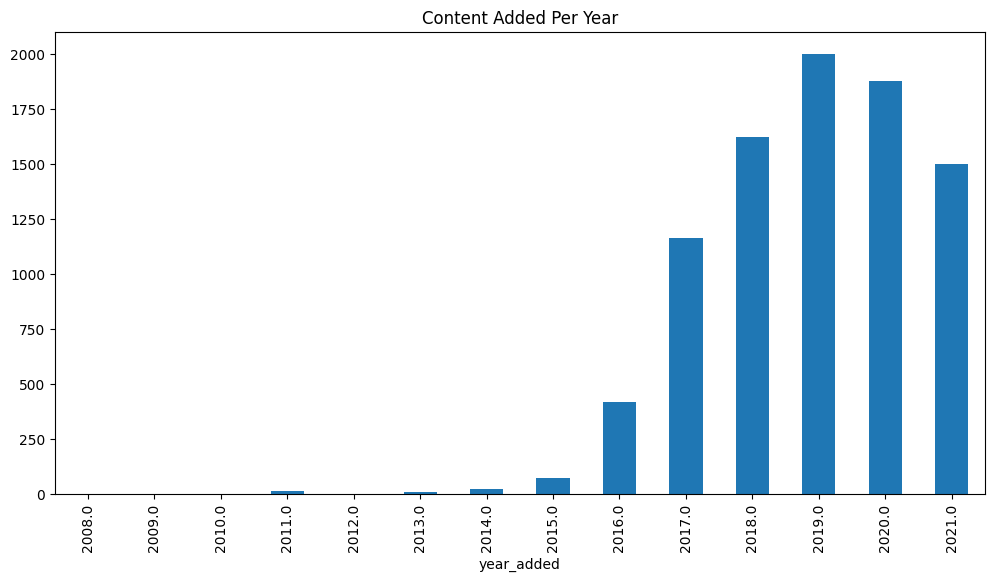

In [ ]:
# Content added each year - 

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Content Added Per Year")

Text(0.5, 1.0, 'Content Added by Month')

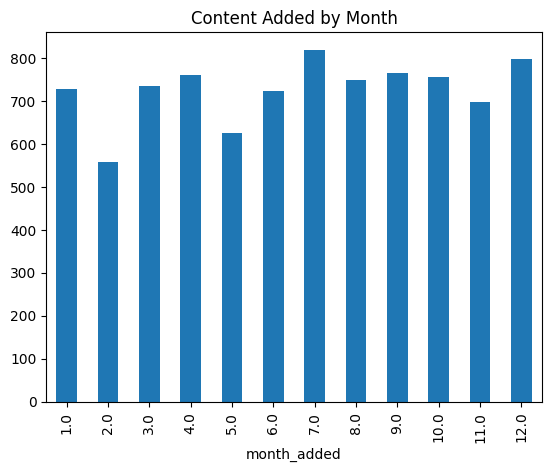

In [ ]:
# Monthly trend - 




df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Content Added by Month")

#### Deep Analysis - 


Text(0.5, 1.0, 'Top 10 Directors on Netflix')

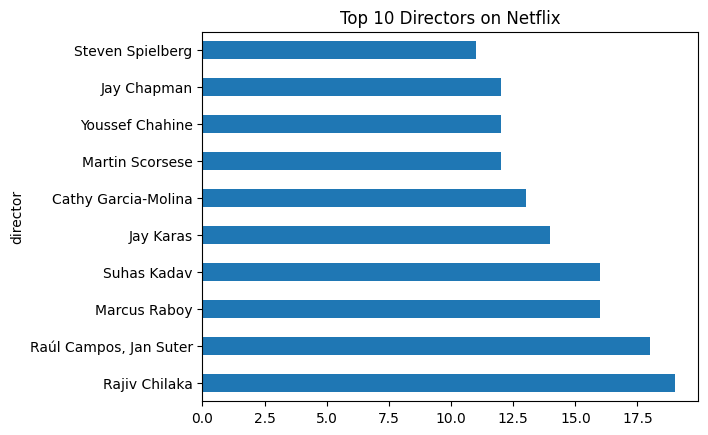

In [16]:
# Top 10 Directors - 

df[df[ 'director'] != 'Unknown']['director'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Directors on Netflix")

<Axes: title={'center': 'Top 10 Genres'}>

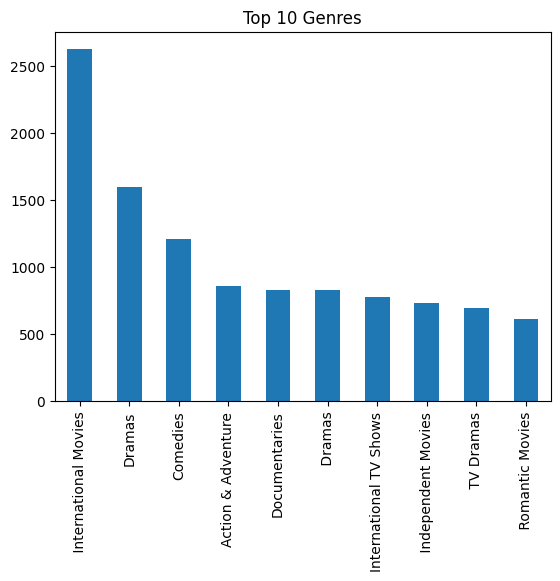

In [19]:
# Most Common genres - 

genres = df['listed_in'].str.split(',',expand= True).stack().value_counts().head(10)
genres.plot(kind='bar', title = 'Top 10 Genres')

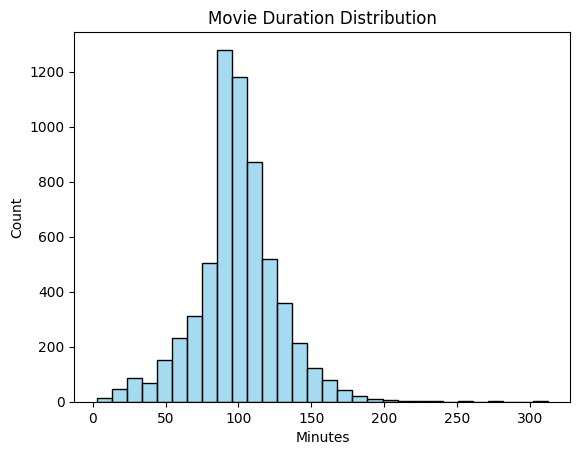

In [21]:
# Content length analysis - 

df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(' min', '', regex=False)
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')
df_movies = df_movies.dropna(subset=['duration'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_movies['duration'], bins=30, color='skyblue')
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

#### Correlation - 

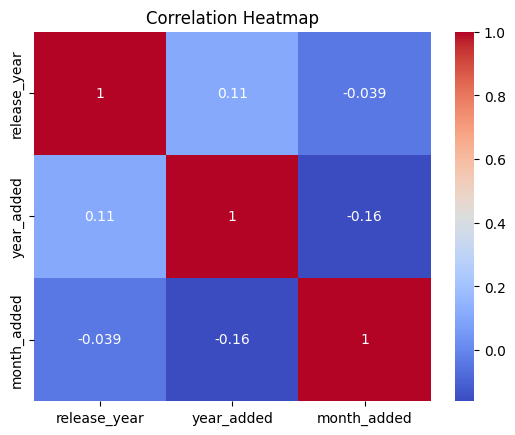

In [23]:
numeric_df = df.select_dtypes(include='number')

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Recommendation System - 

In [ ]:
# Import libraries - 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# Handle missing Descriptions - 

df['description'] = df['description'].fillna('')



In [26]:
# Convert text to Vectors - 

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

In [27]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [29]:
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

In [31]:
# Define the recommendation function - 

def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip()
    if title not in indices:
        return ["❌ Title not found. Try another."]

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Skip self

    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()

In [33]:
get_recommendations("The Crown")

['Elizabeth and Margaret: Love and Loyalty',
 'The Naked Gun: From the Files of Police Squad!',
 'The Queen',
 'The Nineties',
 'Elizabeth at 90: A Family Tribute']

#### Conclusion & Insights -

Here what valuable insights are drawn by the analysis of thus dataset 'netflix_titles.csv'

- Majority of the content is Movies
- Most of the content was added in 2019-2020
- USA leads in content production
- Top genres include Dramas, Documentaries, and Comedies  
- Most movies are 90-120 mins in duration.
- Dramas, Comedies, and Documentaries are the most common genres.
- Built a simple recommendation system using movie descriptions.
- Netflix can improve by focusing on trending genres and personalizing content.